# 피마 인디언 당뇨병 예측
* 피마인디안 당뇨병 데이터를 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델 수립(북아메리카 피마지역 인디언 원주민)
* 평가지표 적용
* [케글 데이터셋 다운로드](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv)

## 피마인디언 당뇨병 데이터세트 변수 설명
* Pregnancies : 임신 횟수
* Blood Pressure : 혈압
* Glucose : 포도당 부하 수치검사
* Skin Thickness : 팔 삼두근 뒷쪽의 피하지방 측정값(mm)
* Insulin : 혈청 인슐린(mu U/ml)
* BMI : 체질량 지수(체중(kg) / 키(m)^2)
* DiabetesPediggreeFunctions : 당뇨 내력 가중치
* Age: 나이
* Outcome : 클래스 결정 값(0 또는 1)

## 기본 설정

In [38]:
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

## 관련 패키지 로드 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 테스트 셋과 훈련 세트 분리
from sklearn.model_selection import train_test_split

# 평가지표 관련 패키지(accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix, precision_recall_curve,roc_curve)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
# 정규분포를 이용한 전처리 
from sklearn.preprocessing import StandardScaler

# 회귀분석
from sklearn.linear_model import LogisticRegression

## 데이터 로드 및 EDA

In [3]:
diabets_data = pd.read_csv("../03.Scikit-Learn/data/diabetes.csv")

In [4]:
diabets_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
diabets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 기술통계량(Technical Statistics)
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* 위에서 최솟값이 `0`인 경우는 정제가 필요해 보임.

### 결정값이 label의 값 분포 확인
* `0` 은 음성
* `1` 은 양성

In [7]:
diabets_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 평가지표 출력 함수

In [8]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    '''
    정확도, 정밀도, 재현률 리턴
    '''
    eval_dict = {}
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))   
    eval_dict['정확도'] = accuracy
    eval_dict['정밀도'] = precision
    eval_dict['재현율'] = recall
    eval_dict['F1'] = f1
    eval_dict['ROC AUC'] = roc_auc
    return eval_dict

### 정밀도_재현율 그래프 

In [9]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    """
    threshold ndarray와 이 threslhold에 따른 정밀도, 재현율 추출 후 시각화 
    """
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율값으로 각각 plot수행
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle = '--', label = '정밀도', color='red')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = '재현율', color='blue')
    
    start, end = plt.xlim() # 0 과 1을 X축, Y축 최소, 최대값을 갖는 눈금을 갖는 도형을 하나 그린다.
    
    # 그 위에 아래와 같은 눈금 및 라벨, 범례를 표시함.
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel("임계치값")
    plt.ylabel("정밀도와 재현율")
    plt.legend()
    plt.show()

## 로지스틱회귀를 이용해 예측 모델 생성
* 피처 데이터 세트와 클래스 데이터세트로 나누고 학습데이터 세트와 테스트 데이터 세트로 분리

In [10]:
# 훈련용과 레이블 데이터셋 슬라이싱
# accuracy_score, f1_score, precision, recall
X = diabets_data.iloc[:,:-1]
y = diabets_data.iloc[:, -1]

# 2.분리한 테이터셋을 훈련용, 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

# 3.logisticRegression으로 훈련, 예측, 평가 수행

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 3.1개별 로우에 대한 예측값 
preds = lr_clf.predict(X_test)

# 0 - Negative, 1 - Positive확률을 numpy.ndarray형태로 리턴
# 앞의 값은 음성확률, 뒤의 값이 양성확률
# 양성일 확률값을 가져옴
pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 3.2 get accuracy, f1_score, precision, recall
get_clf_eval(y_test, preds, pred_proba)    

오차 행렬
[[91  9]
 [21 33]]
정확도: 0.8052, 정밀도: 0.7857, 재현율: 0.6111,    F1: 0.6875, AUC:0.8293


{'정확도': 0.8051948051948052,
 '정밀도': 0.7857142857142857,
 '재현율': 0.6111111111111112,
 'F1': 0.6875000000000001,
 'ROC AUC': 0.8292592592592593}

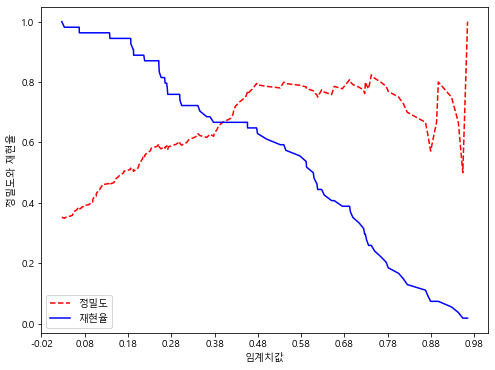

In [11]:
# precision recall곡선
precision_recall_curve_plot(y_test, pred_proba)

* 재현율 곡선을 보면 임계값을 0.42정도로 하면 정밀도와 재현율이 균형을 이룰것으로 보이지만 재현률. 즉, 양성판정비율 및 정밀도 0.7이 안되는 수치에 머물러 있기때문에 임계치값을 조정하기 전에 데이터를 살펴보야 한다

### 당뇨병 데이터의 통계값
* 각 피처들의 4분위 분포 확인

In [12]:
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

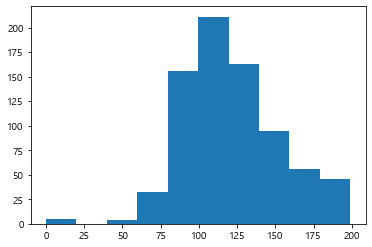

In [13]:
plt.hist(diabets_data.Glucose, bins = 10)

### 피처가 0인 값의 히스토그램

In [14]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

def show_hist_zero_feature(zero_features,df):
    '''
    Show histogram for zero features
    '''
    for zero_feature in zero_features:
        plt.figure(figsize=(8, 6))
        plt.hist(diabets_data[zero_feature], bins = 10)
        plt.title(zero_feature)
    plt.show()

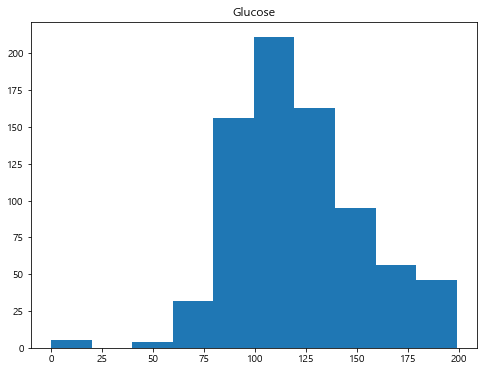

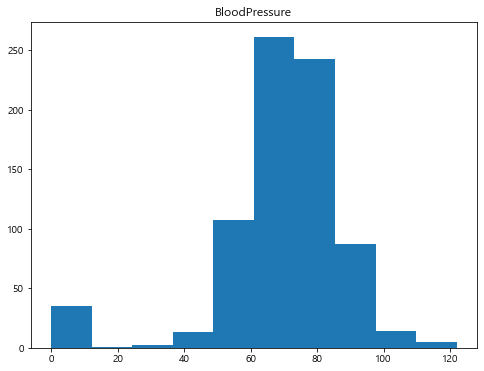

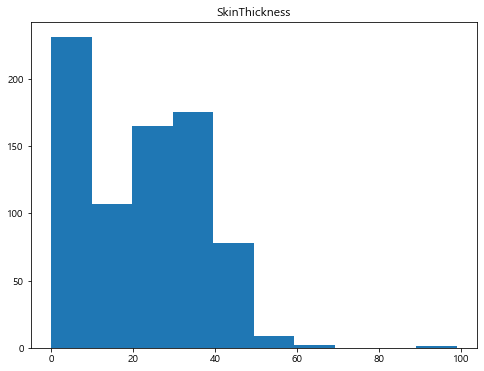

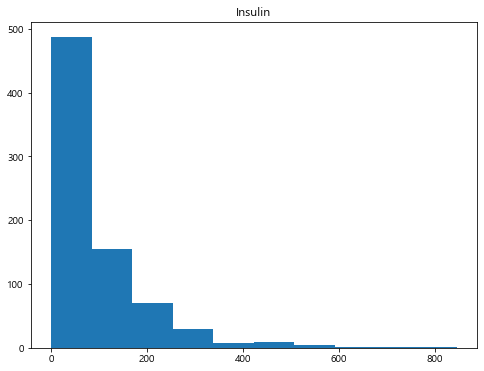

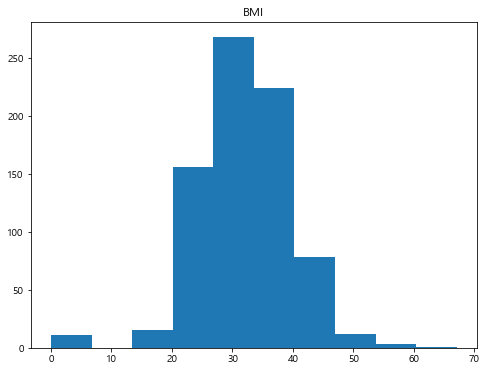

In [15]:
show_hist_zero_feature(zero_features, diabets_data)

### min()값이 0인 것에 대한 어느정도의 비율인지를 확인하고 데이터프레임으로 확인

In [16]:
# `0`값을 검사할 리스트 
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
def get_zero_features_rate(zero_features):
    """
    0인 값이 있는 특성들을 리스트 타입으로 받아서 
    해당 특성들이 전체 갯수에서 차지하는 비율을 계산해
    데이터프레임으로 리턴
    """
    result = {}
    #전체 데이터 건수 
    total_count = diabets_data['Glucose'].count()
    
    # features로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
    for zero_feature in zero_features:
        zero_count = diabets_data[diabets_data[zero_feature]==0][zero_feature].count()
        percent = np.round(100 * zero_count / total_count, 2)
        result[zero_feature] = [zero_count, percent]
    result_df = pd.DataFrame(data = result.values(), index = result.keys(), columns = ['특성값_0_갯수', '특성값_0_비율'])
    return result_df

get_zero_features_rate(zero_features)

,특성값_0_갯수,특성값_0_비율
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43


### 특성의 값이 `0`인 것들이 많기 때문에 전처리 필요
* 삭제하면 데이터분석에 영향을 주므로 삭제보다는 평균값으로 대체하기로 결정

In [ ]:
mean_zero_features = [diabets_data[zero_features].mean()]
mean_zero_features

In [40]:
# 위의 평균값보다는 중앙값(median)으로 대치
median_zero_features = [diabets_data[zero_features].median()]
median_zero_features

[Glucose          117.00
 BloodPressure     72.00
 SkinThickness     23.00
 Insulin           31.25
 BMI               32.00
 dtype: float64]

In [ ]:
diabets_data[zero_features] = diabets_data[zero_features].replace(0, mean_zero_features)

In [41]:
# median
diabets_data[zero_features]=diabets_data[zero_features].replace(0, diabets_data[zero_features].median())
display(diabets_data.head(), diabets_data.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
767,1,93,70,31,30.5,30.4,0.315,23,0


In [19]:
# mean
diabets_data[zero_features]=diabets_data[zero_features].replace(0, diabets_data[zero_features].mean())
display(diabets_data.head(), diabets_data.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
767,1,93,70,31,30.5,30.4,0.315,23,0


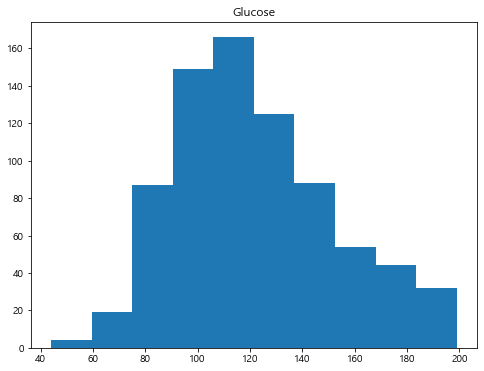

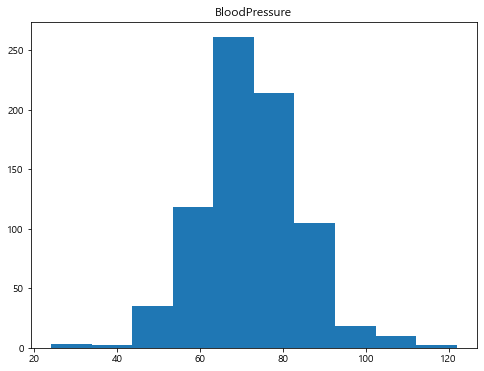

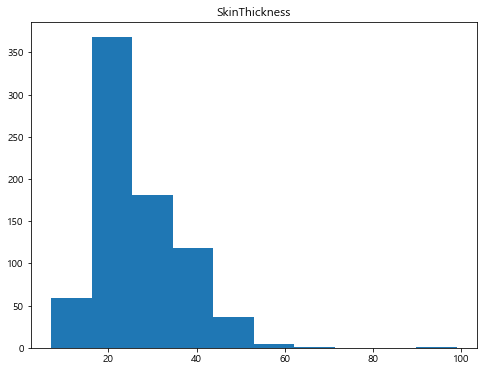

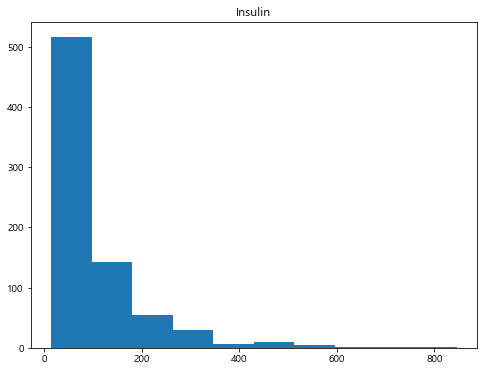

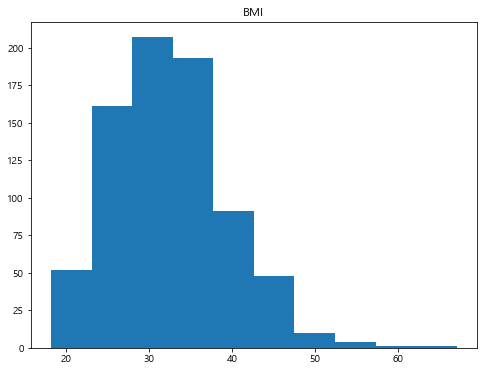

In [20]:
# ends up with no zero
show_hist_zero_feature(zero_features, diabets_data)

###  `0`값을 평균값으로 대체 후 피처 스케일링 적용
* StandardScaler클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
* 피처 스케일링 적용 후 학습데이터세트와 테스트 데이터 세트 분리
* 로지스틱 회귀 적용 후 학습평가 

In [42]:
X = diabets_data.iloc[:, :-1] # train datasets
y = diabets_data.iloc[:, -1]  # target datasets

# StandardScaler 
# When if Logistic regression, score could be enhances sometimes
#(로지스틱 회귀이기때문에 데이터가 정규분포 형태로 되어있으면 성능이 좋아지는 경우가 있다.)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=2021, stratify=y)
# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 회귀 예측
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[92  8]
 [24 30]]
정확도: 0.7922, 정밀도: 0.7895, 재현율: 0.5556,    F1: 0.6522, AUC:0.8630


{'정확도': 0.7922077922077922,
 '정밀도': 0.7894736842105263,
 '재현율': 0.5555555555555556,
 'F1': 0.6521739130434783,
 'ROC AUC': 0.862962962962963}

* `데이터 변환` 과 `스케일링`을 통해 일정부분 평가지표가 성능이 개선됨을 알 수 있다.
* 하지만 `재현율` 수치는 개선이 필요해 보임. (암진단율 수치가 0.61밖에 되지않음)

### 분류 결정 임계값을 변환시키면서 재현율 값의 상승 수치 확인

In [23]:
from sklearn.preprocessing import Binarizer

In [32]:
def get_eval_by_threshold(y_test, pred=None, pred_proba=None, thresholds=None):      
    '''
    임계치 값을 계속 변경시키면서,정확도, 정밀도, 재현율, F1스코어, AUC스코어, 오차행렬을 리턴
    '''
    result = {}
    for customer_threshold in thresholds:
        binarizer = Binarizer(threshold = customer_threshold)
        binarizer.fit(pred_proba)
        # Binarizer은 일차원의 ndarray타입을 인자로 받아야 하기 때문에 앞단에서 .reshape(-1,1)
        customer_predict = binarizer.transform(pred_proba)
        result[customer_threshold] = get_clf_eval(y_test, customer_predict, pred_proba)
    return result

In [33]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pd.DataFrame(get_eval_by_threshold(y_test, pred, pred_proba.reshape(-1, 1), thresholds))

오차 행렬
[[76 24]
 [11 43]]
정확도: 0.7727, 정밀도: 0.6418, 재현율: 0.7963,    F1: 0.7107, AUC:0.8630
오차 행렬
[[78 22]
 [12 42]]
정확도: 0.7792, 정밀도: 0.6562, 재현율: 0.7778,    F1: 0.7119, AUC:0.8630
오차 행렬
[[82 18]
 [16 38]]
정확도: 0.7792, 정밀도: 0.6786, 재현율: 0.7037,    F1: 0.6909, AUC:0.8630
오차 행렬
[[86 14]
 [16 38]]
정확도: 0.8052, 정밀도: 0.7308, 재현율: 0.7037,    F1: 0.7170, AUC:0.8630
오차 행렬
[[87 13]
 [17 37]]
정확도: 0.8052, 정밀도: 0.7400, 재현율: 0.6852,    F1: 0.7115, AUC:0.8630
오차 행렬
[[90 10]
 [20 34]]
정확도: 0.8052, 정밀도: 0.7727, 재현율: 0.6296,    F1: 0.6939, AUC:0.8630
오차 행렬
[[92  8]
 [23 31]]
정확도: 0.7987, 정밀도: 0.7949, 재현율: 0.5741,    F1: 0.6667, AUC:0.8630
오차 행렬
[[92  8]
 [24 30]]
정확도: 0.7922, 정밀도: 0.7895, 재현율: 0.5556,    F1: 0.6522, AUC:0.8630


,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.772727,0.779221,0.779221,0.805195,0.805195,0.805195,0.798701,0.792208
정밀도,0.641791,0.656250,0.678571,0.730769,0.740000,0.772727,0.794872,0.789474
재현율,0.796296,0.777778,0.703704,0.703704,0.685185,0.629630,0.574074,0.555556
F1,0.710744,0.711864,0.690909,0.716981,0.711538,0.693878,0.666667,0.652174
ROC AUC,0.862963,0.862963,0.862963,0.862963,0.862963,0.862963,0.862963,0.862963


* 수치가 0인 값을 median값으로 대치하고 수행하면 임계값 0.42일때 ,전체적인 성능 평가를 유지하면서 재현율을 상승시키는 절충점이 되는 임계치 포인트이다.

### 임계치 0.42을 가지고 로지스틱 회귀모델 예측
* `0`인 값을 `median()`으로 대치

In [36]:
binarizer = Binarizer(threshold = 0.42)
pred_th_042 = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test, pred_th_042, pred_proba)

오차 행렬
[[87 13]
 [17 37]]
정확도: 0.8052, 정밀도: 0.7400, 재현율: 0.6852,    F1: 0.7115, AUC:0.8630


{'정확도': 0.8051948051948052,
 '정밀도': 0.74,
 '재현율': 0.6851851851851852,
 'F1': 0.7115384615384615,
 'ROC AUC': 0.862962962962963}

### 임계치 0.48을 가지고 로지스틱 회귀모델 예측
* `0`인 값을 `mean()`으로 대치

In [37]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba)

오차 행렬
[[92  8]
 [23 31]]
정확도: 0.7987, 정밀도: 0.7949, 재현율: 0.5741,    F1: 0.6667, AUC:0.8630


{'정확도': 0.7987012987012987,
 '정밀도': 0.7948717948717948,
 '재현율': 0.5740740740740741,
 'F1': 0.6666666666666666,
 'ROC AUC': 0.862962962962963}

## 정리

* 이진 분류의 레이블 값이 불균형하게 분포될 경우, 단순히 예측결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝 모델의 예측성능을 평가할 수 없음.
* 오차행렬은 Negative와 Positive값을 가지는 실제 클래스값과 예측 클래스값이 True와 False에 따라 TN,FP,FN.TP매핑되는 4분명 행렬을 기반으로 예측성능을 평가
* 정밀도(Precision)와 재현율(Recall)은 Positive 데이터 세트의 예측 선능에 좀 더 초점을 맞춘 평가지표.분류결정 임계값을 조정해ㅓ 정밀도 또는 재현율의 수치를 높이거나 낮출 수 있습니다.
* F1 스코어는 정밀도와 재현율을 결합한 평가지표이며, 정밀도와 재현율이 어느 한쪽으로 치워치지 않을때 높은 지표값을 가지게됩니다.
* ROC-AUC 스코어는 일반적으로 이진분류의 성능 평가를 위해 가장 많이 사용되는 지표.AUC값은 ROC곡선 밑의 면적을 구한것으로 일반적으로 1에 가까울수로고 좋은 수치입니다.
* 이진분류에서 정밀도, 재현율, F1 score, AUC Score가 주로 성능 평가지표가 활용
* 오차 행렬은 실제 클래스값과 예측 클래스 값의 True, False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 제공